Worksheet 3

1. Consider a discrete time LTI system of transfer function H(z) = (1 + a^2)(z^2 + 1)/ (2(z^2 + a^2))
Study the system frequency response with different values of a = 0.1 , 0.9.
Comment on result.

**Load Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, iirnotch
from scipy.fftpack import fft
from scipy.signal import freqz

**Select Parameters**

In [ ]:

# Define the range of angular frequencies (in radians per sample)
# You can adjust the sampling frequency (fs) to your needs
fs = 1.0  # Example sampling frequency
omega_per_sample = np.linspace(0, 2 * np.pi, 1000)

# Define the different values of 'a'
a_values = [0.1, 0.9]

# Initialize an empty list to store magnitude and phase for each 'a'
magnitude_responses = []
phase_responses = []


**Frequency Response**

In [ ]:

# Calculate the frequency response for each 'a' value
for a in a_values:
    # Calculate the transfer function for the given 'a'
    numerator = (1 + a ** 2) * (np.exp(1j * omega_per_sample) ** 2 + 1)
    denominator = 2 * (np.exp(1j * omega_per_sample) ** 2 + a ** 2)
    H = numerator / denominator

    # Calculate magnitude and phase responses
    magnitude = np.abs(H)
    phase = np.angle(H, deg=True)  # Convert phase to degrees

    magnitude_responses.append(magnitude)
    phase_responses.append(phase)


**Plot Section**

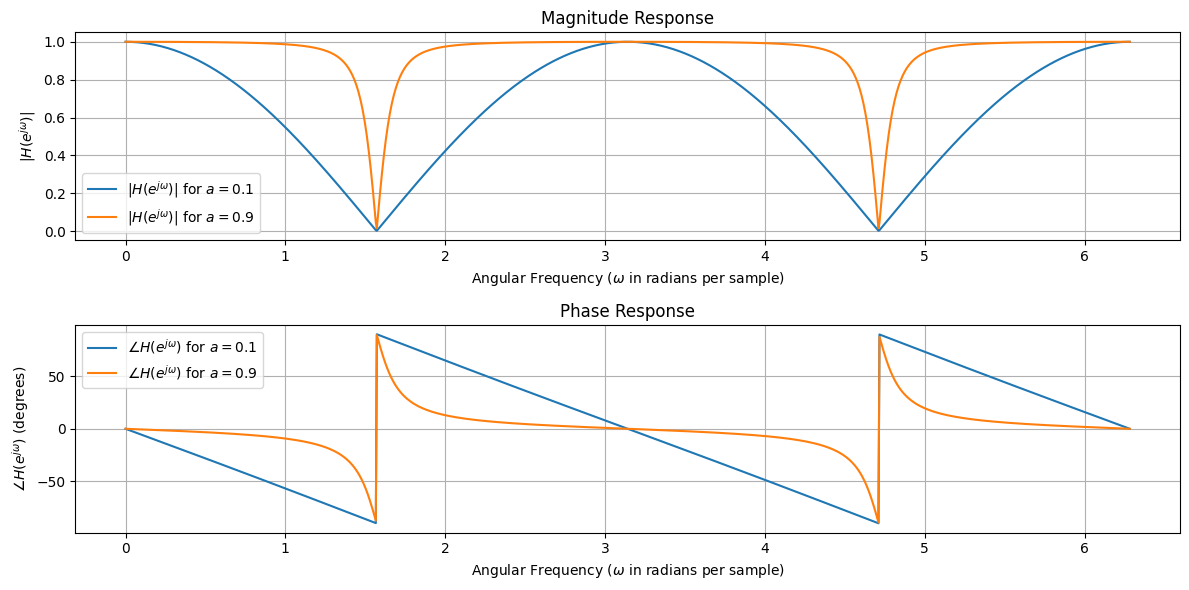

In [ ]:

# Create subplots for magnitude and phase responses
plt.figure(figsize=(12, 6))

# Magnitude Response
plt.subplot(2, 1, 1)
plt.plot(omega_per_sample, magnitude_responses[0], label=f'${{|H(e^{{j\\omega}})|}}$ for $a = {a_values[0]}$')
plt.plot(omega_per_sample, magnitude_responses[1], label=f'${{|H(e^{{j\\omega}})|}}$ for $a = {a_values[1]}$')
plt.title('Magnitude Response')
plt.xlabel('Angular Frequency ($\\omega$ in radians per sample)')
plt.ylabel('${{|H(e^{{j\\omega}})|}}$')
plt.legend()
plt.grid()

# Phase Response
plt.subplot(2, 1, 2)
plt.plot(omega_per_sample, phase_responses[0], label=f'${{\\angle H(e^{{j\\omega}})}}$ for $a = {a_values[0]}$')
plt.plot(omega_per_sample, phase_responses[1], label=f'${{\\angle H(e^{{j\\omega}})}}$ for $a = {a_values[1]}$')
plt.title('Phase Response')
plt.xlabel('Angular Frequency ($\\omega$ in radians per sample)')
plt.ylabel('${{\\angle H(e^{{j\\omega}})}}$ (degrees)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


2. A sinusoidal signal of (300 hz, 3 volt) is contaminated with line frequency
(50 hz, 1 volt). Design a digital filter, placing poles and zeros to remove the
interference components. Consider the sampling frequency as 8 khz.
• Plot all the signals.
• Plot output signal amplitude with the input signal frequency from 50 hz
- 500 hz (frequency update step size is 10 hz) and interpret the graph.
• Show filter frequency response.

**Select Parameters**

In [ ]:

# Signal parameters
fs = 8000  # Sampling frequency (8 kHz)
T = 1 / fs  # Time period
t = np.arange(0, 1, T)  # Time vector (seconds)
f_signal = 300  # Frequency of the sinusoidal signal (Hz)
amp_signal = 3  # Amplitude of the sinusoidal signal (units)
f_noise = 50  # Frequency of the interference (Hz)
amp_noise = 1  # Amplitude of the interference (units)


**Generate Signal**

In [ ]:

# Create the clean signal (sinusoidal signal without interference)
clean_signal = amp_signal * np.sin(2 * np.pi * f_signal * t)

# Create the input signal (sinusoidal signal with interference)
input_signal = clean_signal + amp_noise * np.sin(2 * np.pi * f_noise * t)


**Designing of Filter and Calculating Signals**

In [ ]:

# Perform FFT to analyze the frequency components
input_signal_fft = fft(input_signal)
frequencies = np.fft.fftfreq(len(input_signal), T)
magnitude = np.abs(input_signal_fft)

# Design a notch filter to remove the interference component
Q = 30.0  # Quality factor
f0 = f_noise  # Frequency to be removed (Hz)
w0 = f0 / (fs / 2)  # Normalized frequency in the range [0, 1]
b, a = iirnotch(w0, Q)
filtered_signal = lfilter(b, a, input_signal)

# Calculate the interference signal
interference_signal = amp_noise * np.sin(2 * np.pi * f_noise * t)


**Plotting Section**

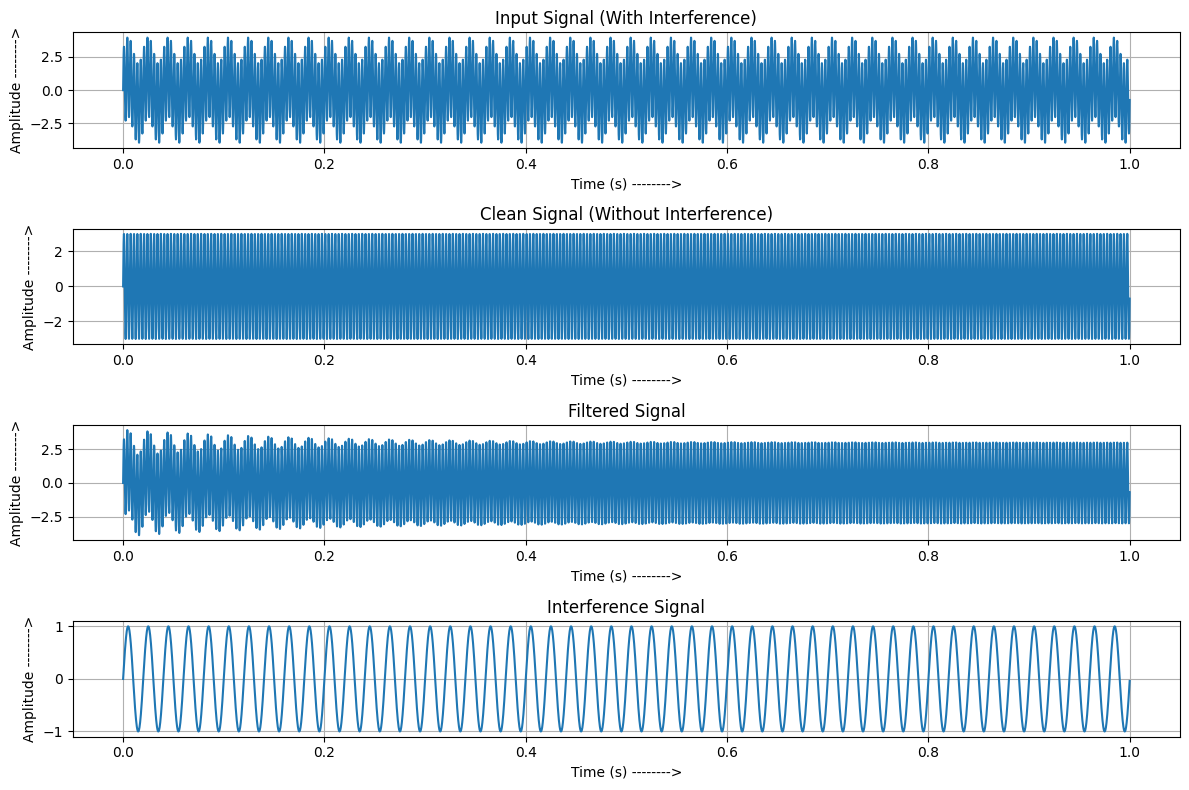

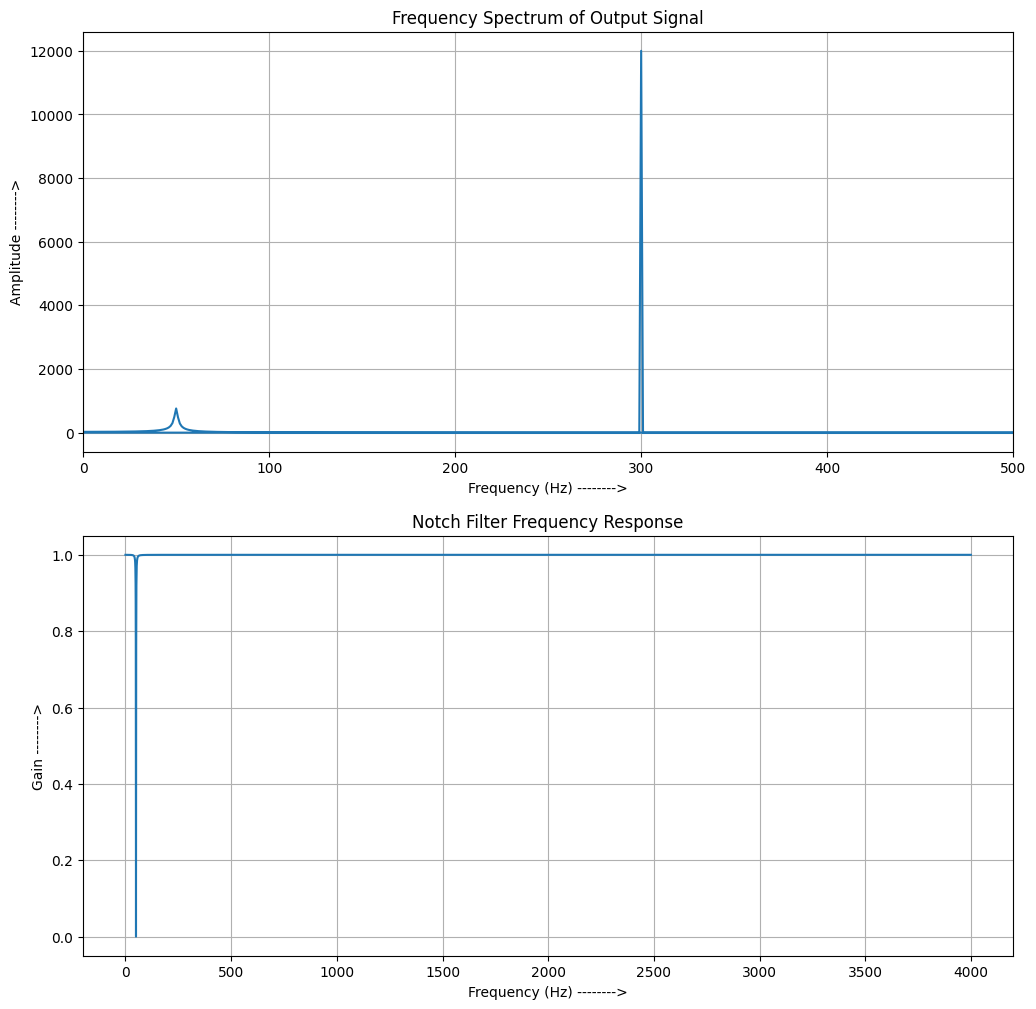

In [ ]:

# Plot the input, clean, filtered, and interference signals
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t, input_signal)
plt.title('Input Signal (With Interference)')
plt.xlabel('Time (s) -------->')
plt.ylabel('Amplitude -------->')
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(t, clean_signal)
plt.title('Clean Signal (Without Interference)')
plt.xlabel('Time (s) -------->')
plt.ylabel('Amplitude -------->')
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Time (s) -------->')
plt.ylabel('Amplitude -------->')
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(t, interference_signal)
plt.title('Interference Signal')
plt.xlabel('Time (s) -------->')
plt.ylabel('Amplitude -------->')
plt.grid()

plt.tight_layout()

plt.figure(figsize=(12, 12))
# Plot output signal amplitude with input signal frequency
output_fft = fft(filtered_signal)
output_magnitude = np.abs(output_fft)
plt.subplot(2, 1, 1)
plt.plot(frequencies, output_magnitude)
plt.title('Frequency Spectrum of Output Signal')
plt.xlabel('Frequency (Hz) -------->')
plt.ylabel('Amplitude -------->')
plt.xlim(0, 500)
plt.grid()

# Plot notch filter frequency response with a smoother curve
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 2)
plt.plot(fs * 0.5 / np.pi * w, np.abs(h))
plt.title('Notch Filter Frequency Response')
plt.xlabel('Frequency (Hz) -------->')
plt.ylabel('Gain -------->')
plt.grid()

plt.show()